1. (1 point). Write down a code able to identify whether a pair of segments share points.
Three possible answers should be available: 
- segments do not intersect.
- segments do intersect giving the intersection point.
- segments do intersect giving an intersection interval.

In [1]:
#external dependencies 
import numpy as np
import pandas as pd
from typing import List, Union 
from itertools import combinations

#custom dependencies
from vector import Vector
from segment import Segment
from sweep_line import SweepLine
from plotter import VectorPlotter as vp
from plotter import SegmentPlotter as sp

S1 = Segment(Vector(np.array([[1],[2]])), Vector(np.array([[3],[4]])))
S2 = Segment(Vector(np.array([[3],[4]])), Vector(np.array([[5],[6]])))
S3 = Segment(Vector(np.array([[2],[3]])), Vector(np.array([[5],[6]])))
S4 = Segment(Vector(np.array([[4],[5]])), Vector(np.array([[5],[6]])))

Use your code to evaluate intersections of S1 with S2 , S3 and S4 .

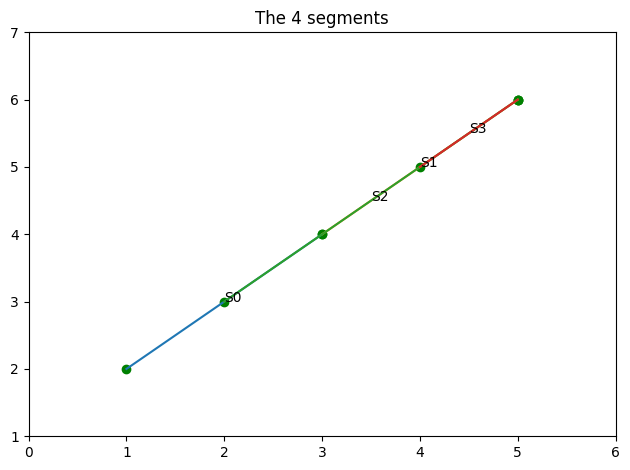

In [2]:
sp.plot_many([S1, S2, S3, S4], with_labels = True, title = "The 4 segments")
sp.show()

To evaluate the intersections of these segments and check the correctness of the code developed until now lets build a brutforcing approach that uses the methods I've built until now.

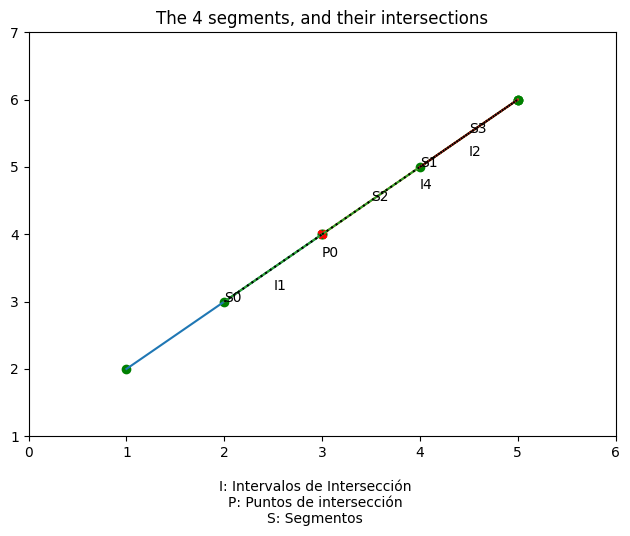

In [3]:
def find_intersections_by_brute_force(segments: List[Segment]) -> List[Vector]:

    """Find the intersections of a list of segments by brute force."""

    pairs = list(combinations(segments, 2))
    intersections = []

    for combination in pairs:

        s1 = combination[0]
        s2 = combination[1]

        if s1.segments_intersect(s2):

            # Find the intersection point (if any)
            intersection = s1.find_intersection(s2)

            # Find the intersection on endpoints (if any)
            intersection_on_endpoints = s1.find_intersection_on_endpoints(s2)

            # Find the intersection on segments (if any)
            intersection_on_segments = s1.find_interval_intersection(s2)
            
            if intersection_on_segments is not None:
                intersections.append(intersection_on_segments)
            elif intersection_on_endpoints is not None:
                intersections.append(intersection_on_endpoints)
            else:
                intersections.append(intersection)

    return intersections

I = find_intersections_by_brute_force([S1, S2, S3, S4])
sp.plot_many_with_intersections(segments = [S1, S2, S3, S4],
                                intersections = I,
                                with_labels = True,
                                title = "The 4 segments, and their intersections")
sp.show()

2. (2 points). Generate a set of points using the following code

In [4]:
np.random.seed(69)
X = np.random.rand(20, 2)

3. (2 points). Implement the sweep line algorithm and apply it to the set of segments
given in the attached file (segmentos.csv). Identify intersection points and intersecting
segments. Plot the process and the result.

In [5]:
def from_csv_2_segments(file: str = "segmentos.csv") -> List[Segment]:
    #dataframe with columns x0, y0, x1, y1
    df = pd.read_csv(file)
    segments = []

    for index, row in df.iterrows():
        start = Vector(np.array([[row["x0"]], [row["y0"]]]))
        end = Vector(np.array([[row["x1"]], [row["y1"]]]))
        segments.append(Segment(start, end, sort_ends=True))
    return segments

custom_test_segments = from_csv_2_segments()

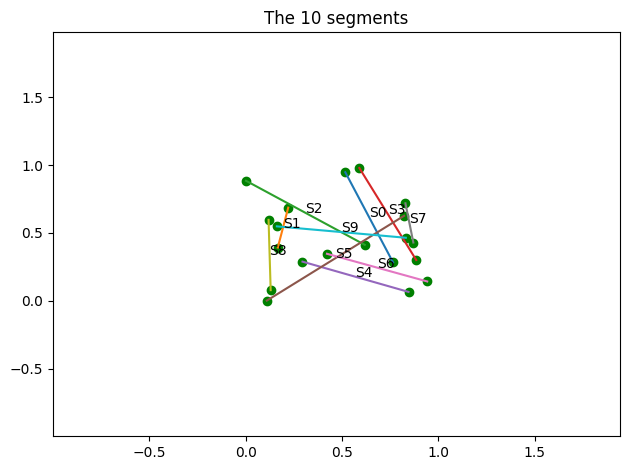

In [6]:
sp.plot_many(custom_test_segments, with_labels = True, title = "The 10 segments")
sp.show()

count:  0
START ENDPOINT
	current node:  Node(0.59)
	sorted status:  [Node(0.59)]


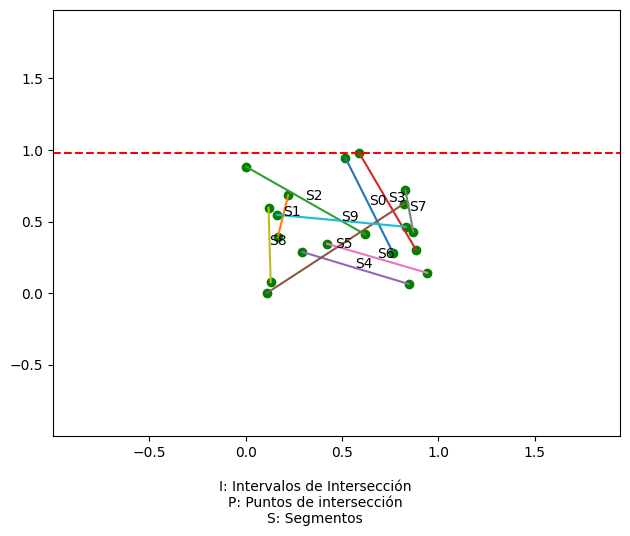

count:  1
	updated nodes:  [Node(0.6034882005899707)]
START ENDPOINT
	current node:  Node(0.517)
	sorted status:  [Node(0.517), Node(0.6034882005899707)]
		has right


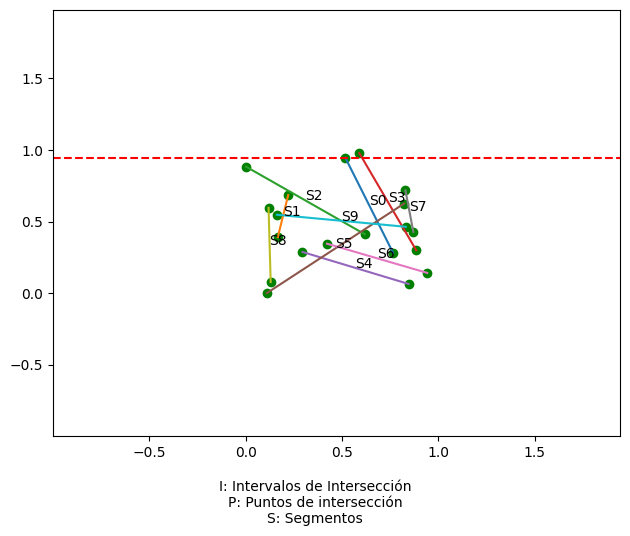

count:  2
	updated nodes:  [Node(0.5404947368421053), Node(0.6308997050147493)]
START ENDPOINT
	current node:  Node(0.0020000000000001367)
	sorted status:  [Node(0.0020000000000001367), Node(0.5404947368421053), Node(0.6308997050147493)]
		has right


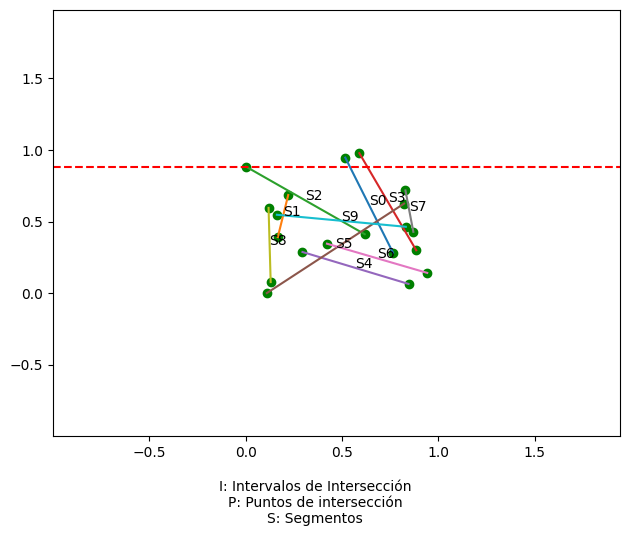

count:  3
	updated nodes:  [Node(0.21864406779661016), Node(0.6024015037593984), Node(0.7031268436578173)]
START ENDPOINT
	current node:  Node(0.829)
	sorted status:  [Node(0.21864406779661016), Node(0.6024015037593984), Node(0.7031268436578173), Node(0.829)]
		has left


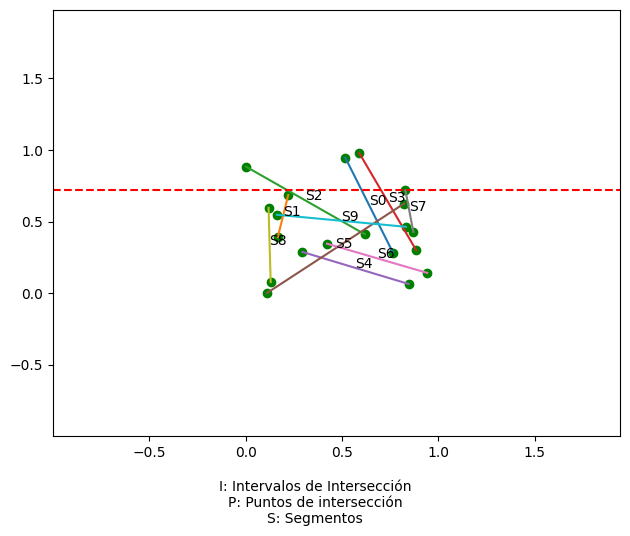

count:  4
	updated nodes:  [Node(0.2604067796610169), Node(0.6143353383458647), Node(0.7170501474926254), Node(0.8335397923875432)]
START ENDPOINT
	current node:  Node(0.221)
	sorted status:  [Node(0.221), Node(0.2604067796610169), Node(0.6143353383458647), Node(0.7170501474926254), Node(0.8335397923875432)]
		has right


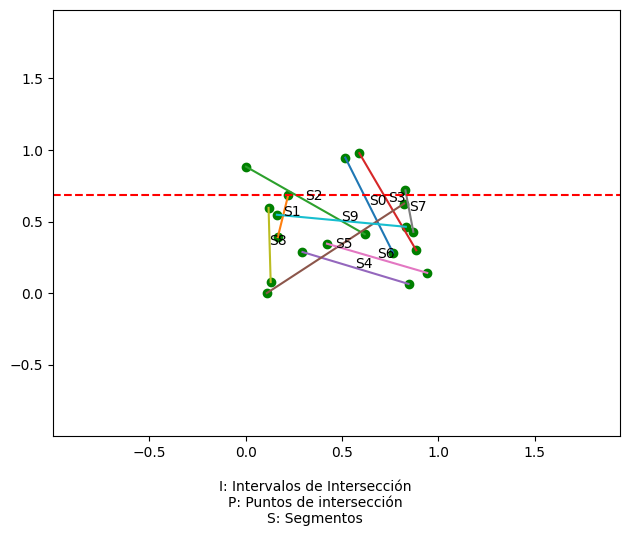

count:  5
	updated nodes:  [Node(0.20997959183673476), Node(0.3387118644067798), Node(0.6367112781954889), Node(0.7431563421828911), Node(0.8420519031141869)]
START ENDPOINT
	current node:  Node(0.822)
	sorted status:  [Node(0.20997959183673476), Node(0.3387118644067798), Node(0.6367112781954889), Node(0.7431563421828911), Node(0.822), Node(0.8420519031141869)]
		has left
		has intersection  Vec(0.7649470178126279, 0.5759183794001299)


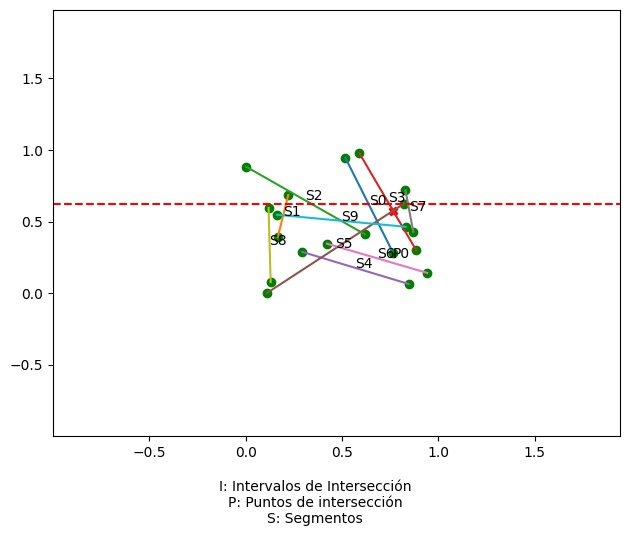

count:  6
	updated nodes:  [Node(0.20446938775510193), Node(0.37786440677966093), Node(0.6478992481203008), Node(0.7562094395280238), Node(0.787824), Node(0.8463079584775086)]
START ENDPOINT
	current node:  Node(0.119)
	sorted status:  [Node(0.119), Node(0.20446938775510193), Node(0.37786440677966093), Node(0.6478992481203008), Node(0.7562094395280238), Node(0.787824), Node(0.8463079584775086)]
		has right


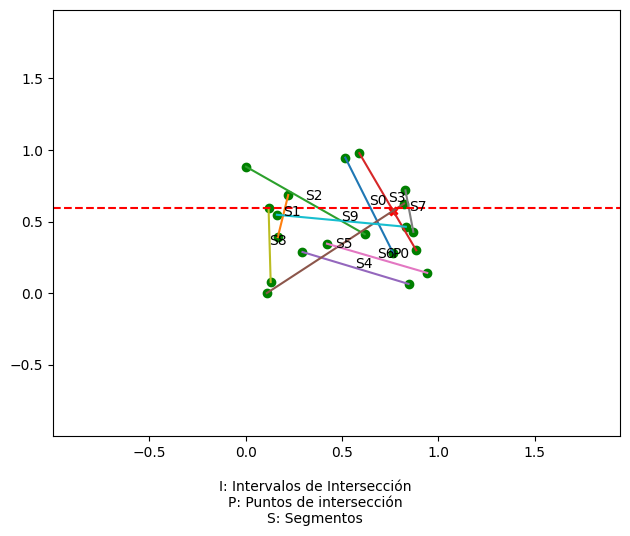

count:  7
	updated nodes:  [Node(0.11942644368069211), Node(0.20078092682859527), Node(0.4040726234947456), Node(0.6553883336973956), Node(0.764947017812628), Node(0.764947017812628), Node(0.8491569081127842)]


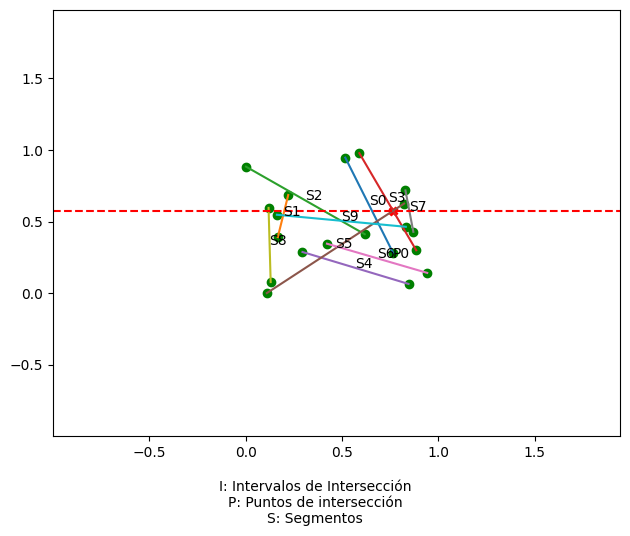

count:  8
	updated nodes:  [Node(0.12001930501930502), Node(0.19565306122448978), Node(0.44050847457627096), Node(0.6658000000000002), Node(0.7331424000000002), Node(0.777094395280236), Node(0.8531176470588235)]
START ENDPOINT
	current node:  Node(0.16200000000000006)
	sorted status:  [Node(0.12001930501930502), Node(0.16200000000000006), Node(0.19565306122448978), Node(0.44050847457627096), Node(0.6658000000000002), Node(0.7331424000000002), Node(0.777094395280236), Node(0.8531176470588235)]
		has left
		has right
		has intersection  Vec(0.194894444941408, 0.5438697557921103)


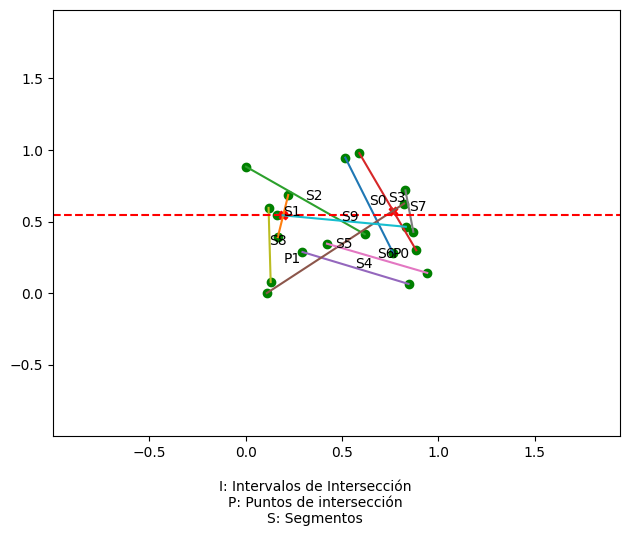

count:  9
	updated nodes:  [Node(0.1201070129078895), Node(0.19489444494140762), Node(0.19489444494140795), Node(0.4458987932882632), Node(0.6673403015993336), Node(0.7284372257983719), Node(0.7788914779370613), Node(0.8537035986592509)]


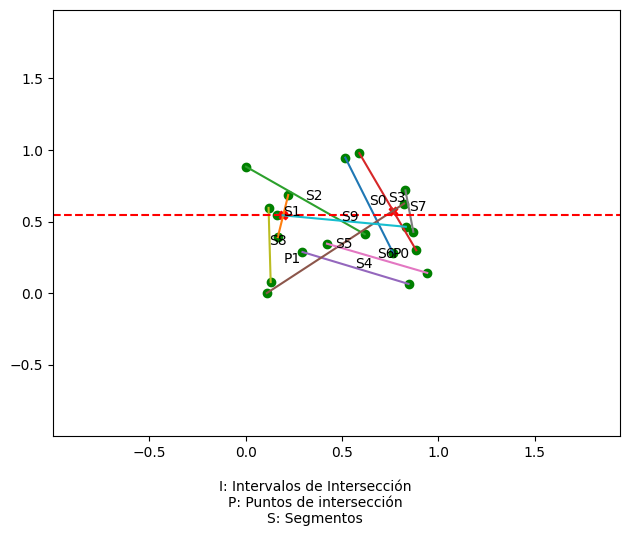

count:  10
	updated nodes:  [Node(0.12180308880308888), Node(0.8309999999999997), Node(0.18022448979591843), Node(0.550135593220339), Node(0.6971263157894738), Node(0.6374495999999998), Node(0.8136430678466078), Node(0.8650346020761246)]
END ENDPOINT
	current node:  Node(0.8309999999999997)
	sorted status:  [Node(0.12180308880308888), Node(0.18022448979591843), Node(0.550135593220339), Node(0.6374495999999998), Node(0.6971263157894738), Node(0.8136430678466078), Node(0.8309999999999997), Node(0.8650346020761246)]
		has left
		has intersection  Vec(0.8126400296640407, 0.46630528775518776)


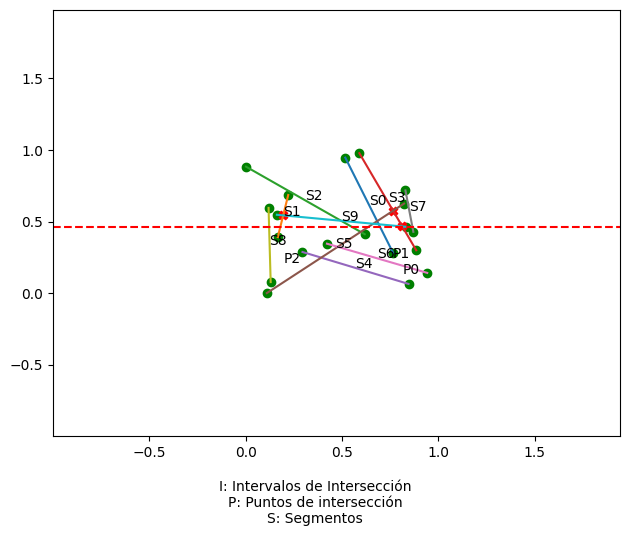

count:  11
	updated nodes:  [Node(0.12175413481600961), Node(0.180647909995851), Node(0.5471269973364499), Node(0.6400757838107098), Node(0.6962665994537044), Node(0.8126400296640407), Node(0.8647075543323091)]


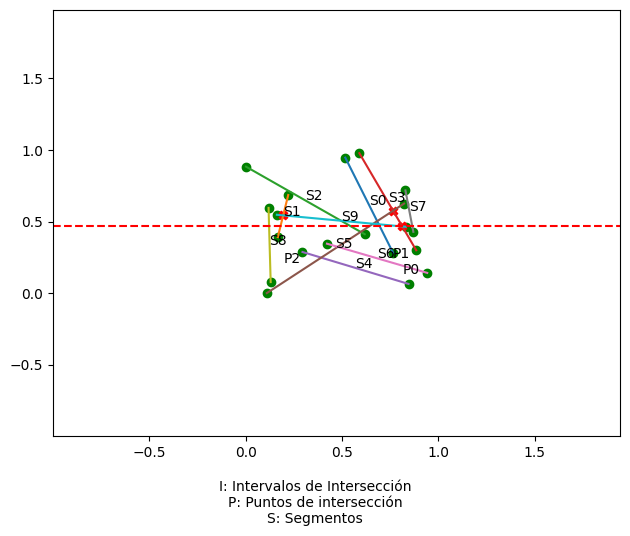

count:  12
	updated nodes:  [Node(0.12254633204633214), Node(0.1737959183673471), Node(0.595813559322034), Node(0.5975776000000002), Node(0.7101789473684212), Node(0.8288716814159295), Node(0.8699999999999999)]
END ENDPOINT
	current node:  Node(0.8699999999999999)
	sorted status:  [Node(0.12254633204633214), Node(0.1737959183673471), Node(0.595813559322034), Node(0.5975776000000002), Node(0.7101789473684212), Node(0.8288716814159295), Node(0.8699999999999999)]
		has left


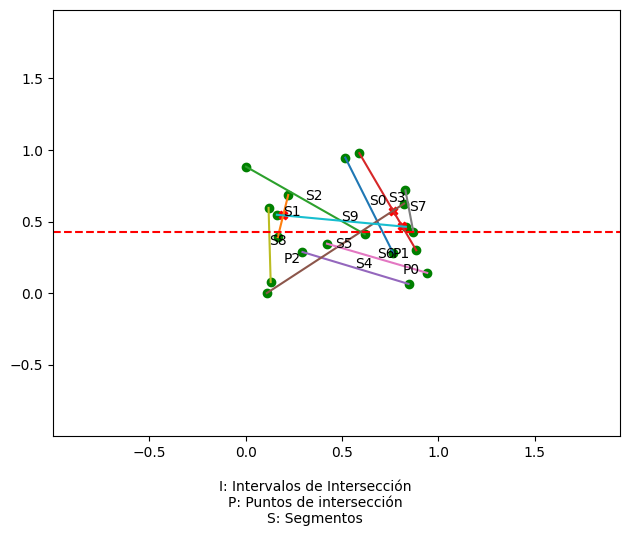

count:  13
	updated nodes:  [Node(0.12290733590733594), Node(0.17067346938775507), Node(0.6180000000000001), Node(0.5782111999999998), Node(0.7165187969924813), Node(0.836268436578171)]
END ENDPOINT
	current node:  Node(0.6180000000000001)
	sorted status:  [Node(0.12290733590733594), Node(0.17067346938775507), Node(0.5782111999999998), Node(0.6180000000000001), Node(0.7165187969924813), Node(0.836268436578171)]
		has left
		has intersection  Vec(0.5967554391843166, 0.4282782998457835)


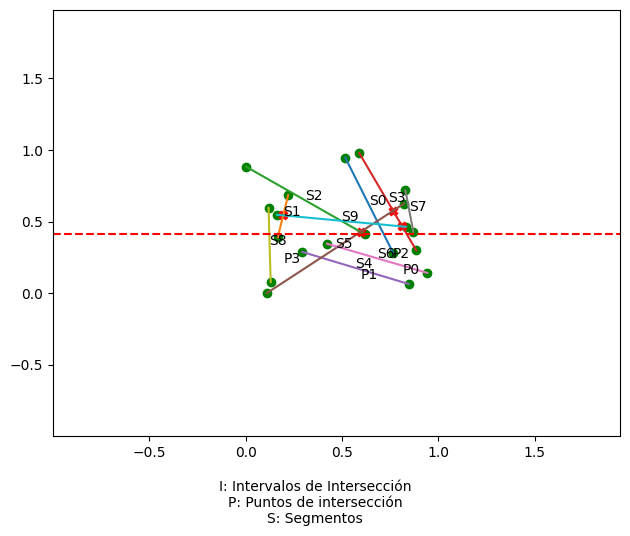

count:  14
	updated nodes:  [Node(0.1225616577252826), Node(0.17366336119616455), Node(0.5967554391843165), Node(0.7104480926890915), Node(0.8291856954948289)]


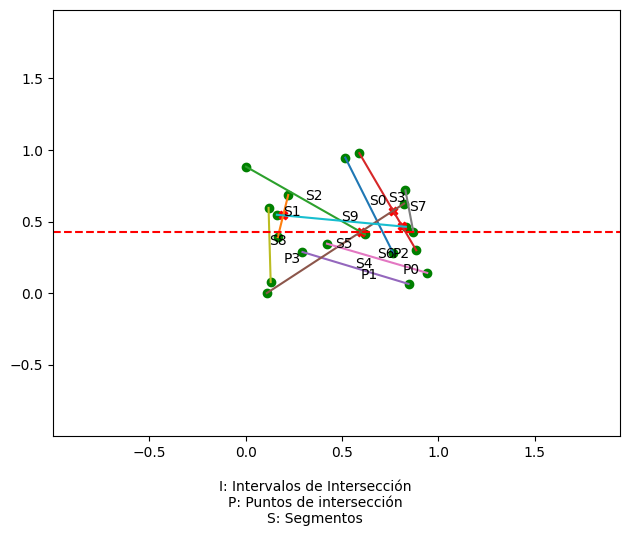

count:  15
	updated nodes:  [Node(0.12333204633204631), Node(0.16700000000000015), Node(0.5554271999999998), Node(0.7239774436090225), Node(0.8449705014749265)]
END ENDPOINT
	current node:  Node(0.16700000000000015)
	sorted status:  [Node(0.12333204633204631), Node(0.16700000000000015), Node(0.5554271999999998), Node(0.7239774436090225), Node(0.8449705014749265)]
		has left
		has right


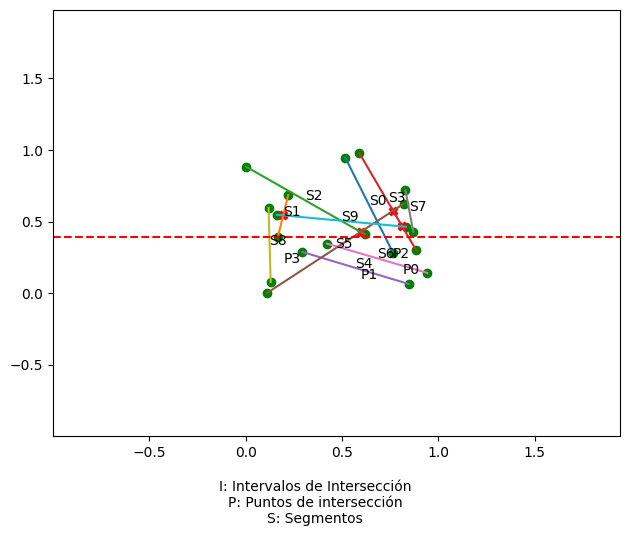

count:  16
	updated nodes:  [Node(0.12430888030888043), Node(0.5030239999999997), Node(0.7411323308270681), Node(0.8649852507374635)]
START ENDPOINT
	current node:  Node(0.42200000000000026)
	sorted status:  [Node(0.12430888030888043), Node(0.42200000000000026), Node(0.5030239999999997), Node(0.7411323308270681), Node(0.8649852507374635)]
		has left
		has right
		has intersection  Vec(0.4779976863272145, 0.32403167690240037)


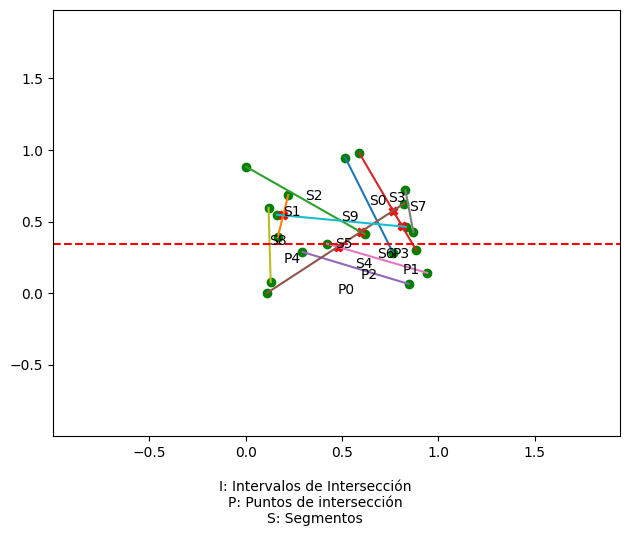

count:  17
	updated nodes:  [Node(0.12477538910052799), Node(0.4779976863272146), Node(0.47799768632721434), Node(0.7493250287642176), Node(0.8745437394008733)]


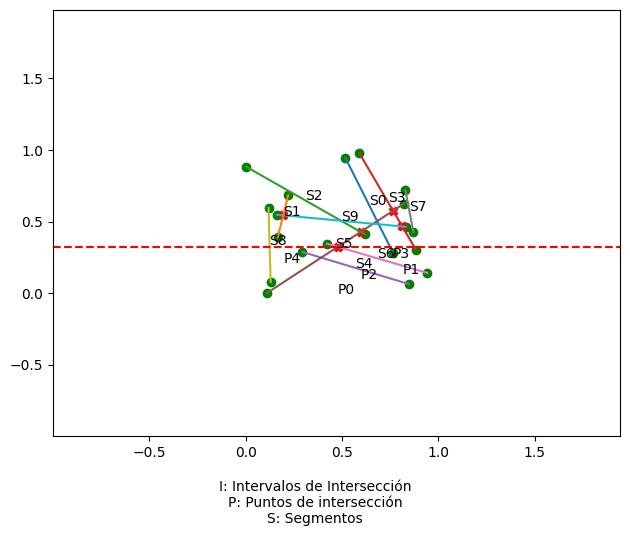

count:  18
	updated nodes:  [Node(0.1252857142857141), Node(0.45062079999999993), Node(0.5392549019607842), Node(0.758287218045113), Node(0.885)]
END ENDPOINT
	current node:  Node(0.885)
	sorted status:  [Node(0.1252857142857141), Node(0.45062079999999993), Node(0.5392549019607842), Node(0.758287218045113), Node(0.885)]
		has left


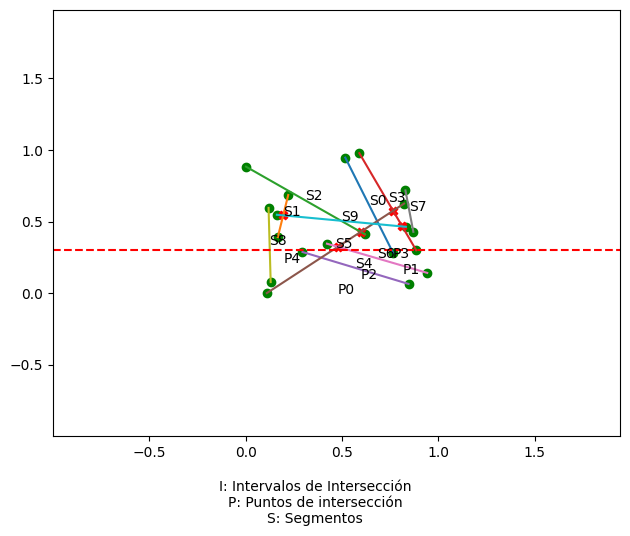

count:  19
	updated nodes:  [Node(0.12554054054054042), Node(0.43695039999999963), Node(0.569843137254902), Node(0.7627624060150376)]
START ENDPOINT
	current node:  Node(0.2949999999999997)
	sorted status:  [Node(0.12554054054054042), Node(0.2949999999999997), Node(0.43695039999999963), Node(0.569843137254902), Node(0.7627624060150376)]
		has left
		has right
		has intersection  Vec(0.3921003490366667, 0.2486302221178605)


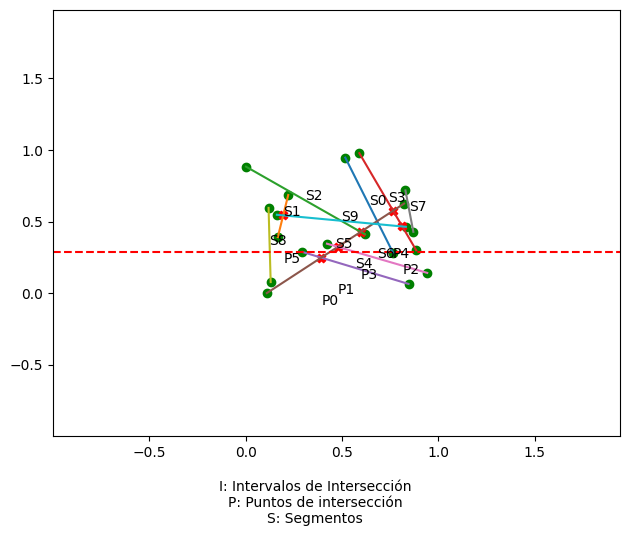

count:  20
	updated nodes:  [Node(0.1256679536679537), Node(0.309798206278027), Node(0.43011520000000003), Node(0.5851372549019606), Node(0.7650000000000003)]
END ENDPOINT
	current node:  Node(0.7650000000000003)
	sorted status:  [Node(0.1256679536679537), Node(0.309798206278027), Node(0.43011520000000003), Node(0.5851372549019606), Node(0.7650000000000003)]
		has left


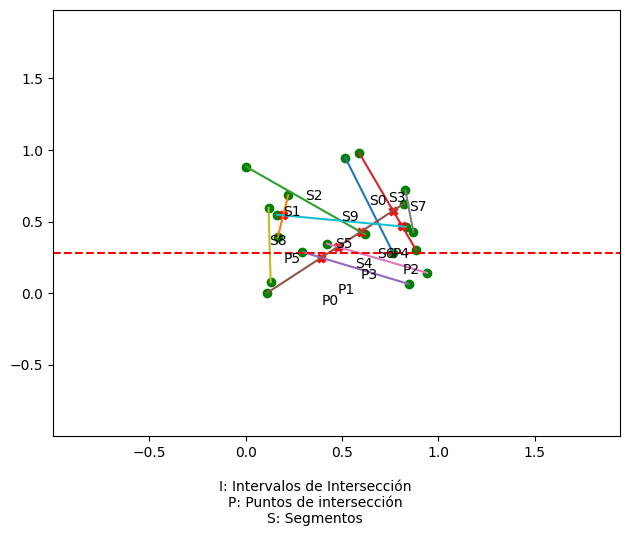

count:  21
	updated nodes:  [Node(0.12637657829479454), Node(0.3921003490366669), Node(0.3921003490366666), Node(0.6701974730329043)]


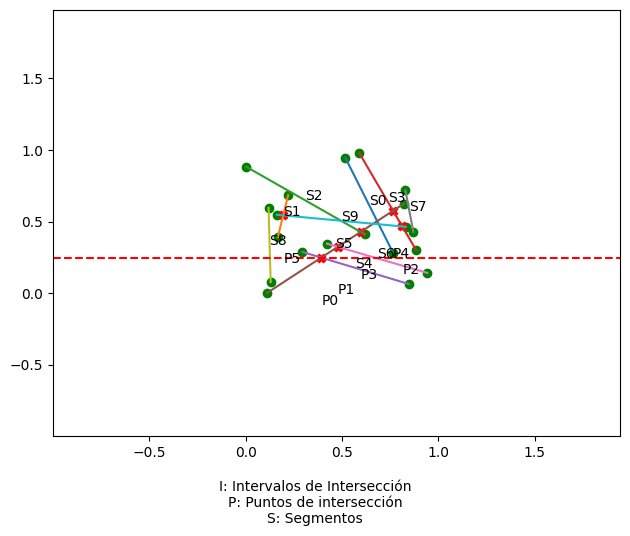

count:  22
	updated nodes:  [Node(0.12864092664092674), Node(0.27062719999999985), Node(0.6550896860986546), Node(0.9420000000000002)]
END ENDPOINT
	current node:  Node(0.9420000000000002)
	sorted status:  [Node(0.12864092664092674), Node(0.27062719999999985), Node(0.6550896860986546), Node(0.9420000000000002)]
		has left


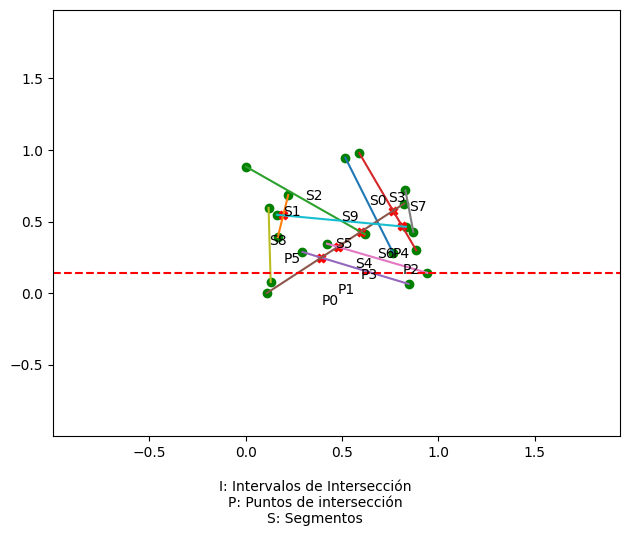

count:  23
	updated nodes:  [Node(0.13000000000000012), Node(0.19771839999999963), Node(0.8129372197309415)]
END ENDPOINT
	current node:  Node(0.13000000000000012)
	sorted status:  [Node(0.13000000000000012), Node(0.19771839999999963), Node(0.8129372197309415)]
		has right


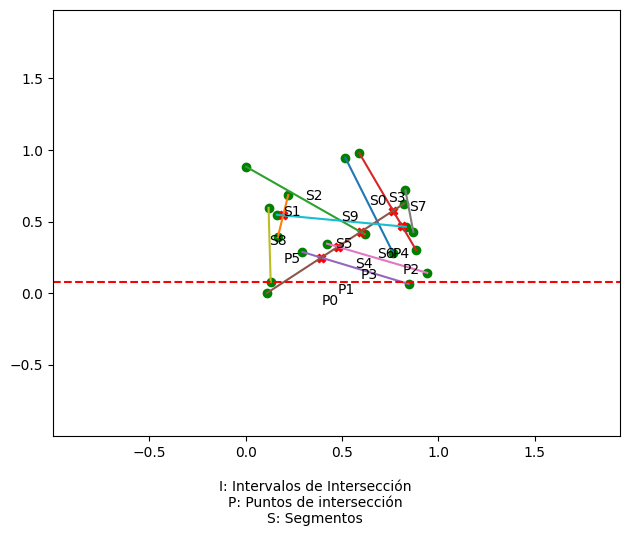

count:  24
	updated nodes:  [Node(0.18290879999999987), Node(0.845)]
END ENDPOINT
	current node:  Node(0.845)
	sorted status:  [Node(0.18290879999999987), Node(0.845)]
		has left
		has intersection  Vec(0.3921003490366667, 0.2486302221178605)


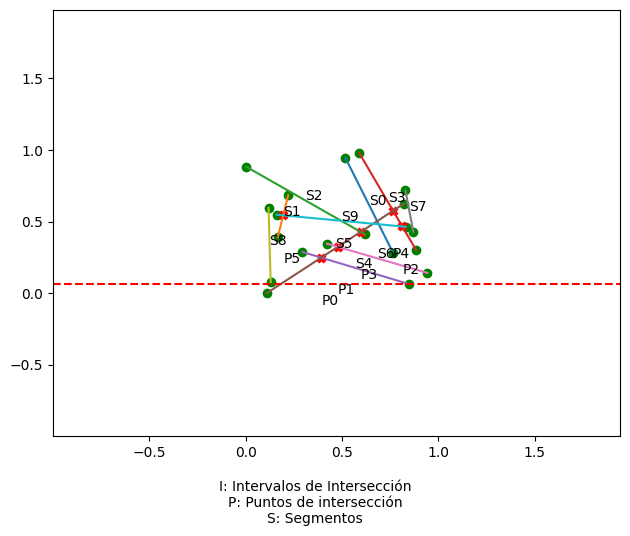

count:  25
	updated nodes:  [Node(0.10999999999999976)]
END ENDPOINT
	current node:  Node(0.10999999999999976)
	sorted status:  [Node(0.10999999999999976)]


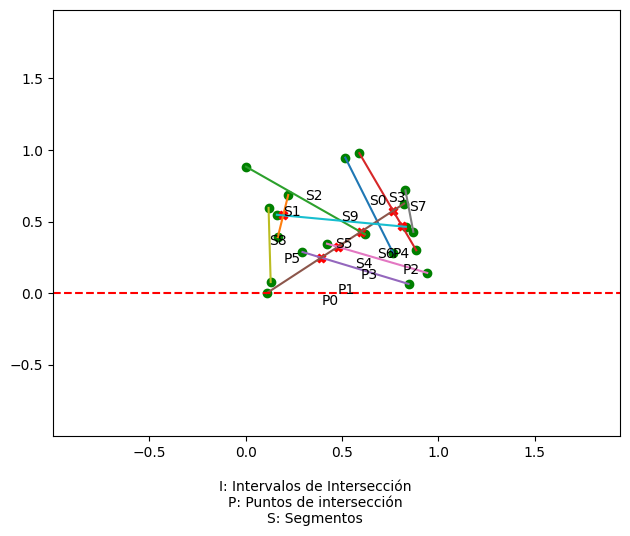

In [7]:
sweep_line_alg = SweepLine(custom_test_segments[:])
sweep_line_alg.run(plotting=True)